# Imports 

In [2]:
import ROOT as rt
import csv
import re
import sys
import collections
from collections import OrderedDict
import uproot
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
from numpy import linalg as LA
from ROOT import TLorentzVector
from array import array
# import PyTEX
import os

import math
import random
from optparse import OptionParser

sys.path.append('/storage/user/jmao/gpu/jmao/cms-llp/delayed_jet_analyzer/lib/')

from histo_utilities import create_TH1D, create_TH2D, create_TGraph,std_color_list, make_ratio_plot

import CMS_lumi, tdrstyle 
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "     Simulation Preliminary"

     
print(sys.version)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import pandas as pd
import pickle as pickle
import shlex
import uproot
import seaborn as sns

from scipy.spatial.distance import cdist
from collections import Counter 
import datetime
import pytz

from prettytable import PrettyTable
from pyjet import cluster

import xgboost as xgb
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier


Welcome to JupyROOT 6.18/02
3.6.8 (default, Aug  7 2019, 17:28:10) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


In [3]:
# root settings
rt.gROOT.SetBatch(True)
rt.gStyle.SetOptStat(0)
rt.gStyle.SetOptFit(111)
rt.gStyle.SetPaintTextFormat("2.1f")

# plt.rcParams["font.family"] = "Arial"
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["text.usetex"] = False
plt.rcParams["mathtext.fontset"] = "cm"

# test_name = 'xgb_HH_vs_QCD_ebBDT'

lumi_sf_sig = 137.0 # scale lumi from sample to full run2
lumi_sf_bkg = 137.0

#output dir

plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200616/'

os.system("mkdir -p "+ plotDir)

0

# ALL BKG TAG EFF

In [13]:
tags = []
tags = [
    


#         'Data 2016',
        'Data 2017',
#         'Data 2017 SinglePhoton',
#         'Data 2017 MuonEG',
#         'Data 2017 SingleMuon',
#         'Data 2017 SingleElectron',
#         'Data 2017 ZLL',
        'Data 2017 JetHT',
#         'Data 2018 MuonEG',
#         'Data 2018',
        ]

# directory
home_dir = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetTimingAnalyzer/'
# file names

fnames = {}

fnames['Data 2016'] = 'V1p17/v5/Data2016/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_Run2016-HighMET-07Aug17_GoodLumi.root'
fnames['Data 2017'] = 'V1p17/v5/Data2017/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_Run2017-HighMET-17Nov2017_GoodLumi.root'
fnames['Data 2018'] = 'V1p17/v5/Data2018/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2018_Run2018-HighMET-17Sept2018_GoodLumi.root'

fnames['Data 2017 MuonEG'] = 'V1p17/v7/Data2017_AOD/MuonEG/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_Run2017-17Nov2017_GoodLumi.root'
fnames['Data 2017 SinglePhoton'] = 'V1p17/v6/Data2017_AOD/SinglePhoton/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_Run2017-17Nov2017_GoodLumi.root'
# fnames['Data 2017 SingleMuon'] = 'V1p17/v7/Data2017_AOD/SingleMuon/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_Run2017-17Nov2017_GoodLumi.root'
fnames['Data 2017 SingleMuon'] = 'V1p17/v8/Data2017_AOD/SingleMuon/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_AOD_Run2017D-17Nov2017-v1_v5_v1.root'
# fnames['Data 2017 SingleMuon'] = 'V1p17/v8/Data2017_AOD/SingleMuon/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_AOD_Run2017E-17Nov2017-v1_v5_v1.root'
fnames['Data 2017 SingleElectron'] = 'V1p17/v8/Data2017_AOD/SingleElectron/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_Run2017-17Nov2017_GoodLumi.root'
fnames['Data 2017 ZLL'] = 'V1p17/v8/Data2017_AOD/Zmumu/normalized/ZLL_Run2_displacedJetMuonNtupler_V1p17_Data2017_Run2017-17Nov2017_GoodLumi.root'
fnames['Data 2017 JetHT'] = 'V1p17/v8/Data2017_AOD/JetHT/normalized/JetHT_Run2_displacedJetMuonNtupler_V1p17_Data2017_Run2017-17Nov2017_GoodLumi.root'

fnames['Data 2018 MuonEG'] = 'V1p17/v5/Data2018_AOD/MuonEG/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2018_Run2018-17Sept2018_GoodLumi.root'

# get all the trees
tree = OrderedDict()

for tag in tags:
    print(home_dir+fnames[tag])

    root_dir = uproot.open(home_dir+fnames[tag])
    tree[tag] = root_dir['SusyLLPTree']

    print ('Open ready')
    print(tag)
    print ('Tree ready')
    print(tree[tag], tree)
    v = tree[tag]
    jet_amax = v['jetGammaMax_ET'].array()
    print(jet_amax[:10])
    jet_amax = v['weight'].array()
    print(jet_amax[:10])
    print(np.unique(jet_amax))
     

/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetTimingAnalyzer/V1p17/v5/Data2017/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_Run2017-HighMET-17Nov2017_GoodLumi.root
Open ready
Data 2017
Tree ready
<TTree b'SusyLLPTree' at 0x7fc2b8e48908> OrderedDict([('Data 2017', <TTree b'SusyLLPTree' at 0x7fc2b8e48908>)])
[[0.3825053 0.8962604] [0.2581324 0.66461104 0.44873026] [0.513396 0.71617186 0.32877555 0.44576126 0.46733537] ... [0.34032586] [] [0.40222892]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1.]
/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetTimingAnalyzer/V1p17/v8/Data2017_AOD/JetHT/normalized/JetHT_Run2_displacedJetMuonNtupler_V1p17_Data2017_Run2017-17Nov2017_GoodLumi.root
Open ready
Data 2017 JetHT
Tree ready
<TTree b'SusyLLPTree' at 0x7fc2b96b4e80> OrderedDict([('Data 2017', <TTree b'SusyLLPTree' at 0x7fc2b8e48908>), ('Data 2017 JetHT', <TTree b'SusyLLPTree' at 0x7fc2b96b4e80>)])
[[0.3825053 0.8962604] [0.22683315 0.25712672] [0.3539904 0.36760163] ... 

# Tag Eff Measurement Region

In [14]:
trg_path=310
njet_cut=-1
met_cut=200
mdphi_cut=0.5
veto=1

mt_cut=100

# jet_eta_cut=2.4
jet_eta_cut=1.48
jet_pt_cut=30
jet_time_cut=-1
jet_phoef_cut=0.8
jet_muef_cut=0.6
jet_eleef_cut=0.6


trg_jet_met = {}
trg_jet_nj = {}
trg_jet_mt = {}
trg_jet_ht = {}
trg_jet_mdphi = {}
trg_pho_mdphi = {}
trg_jet_w = {} 

trg_jet_pt = {}
trg_jet_eta = {}
trg_jet_e = {}
trg_jet_phi = {}

trg_jet_chef = {}
trg_jet_muef = {}
trg_jet_eleef = {}
trg_jet_phoef = {}

trg_jet_nhef = {}
trg_jet_cemef = {}
trg_jet_nemef = {}

trg_jet_tmf = {}
trg_jet_dr = {}
trg_jet_time = {}


for k,v in tree.items():
    print(k,v)

    # branches
    met = v['met'].array()
#     mt = v['MT_'].array()
    ht = v['HT'].array()
#     mdphi = v['jetMet_dPhi'].array()
    mdphi = v['jetMet_dPhiMin'].array()
    if 'Photon' in k:
        phomdphi = v['jetPho_dPhiMin'].array()
    hlt = v['HLTDecision'].array()[:,trg_path]
    nj = v['nJets'].array()
    nlep = v['nLeptons'].array()
    nmu = v['nMuons'].array()
    nele = v['nElectrons'].array()
    ntau = v['nTaus'].array()
    npho = v['nPhotons'].array()
    
    mt = v['MT'].array()
    
    #flags
    flag1 =  v['Flag2_globalSuperTightHalo2016Filter'].array()
#     flag2 =  v['Flag2_globalTightHalo2016Filter'].array() 
#     flag3 =  v['Flag2_goodVertices'].array()
#     flag4 =  v['Flag2_BadChargedCandidateFilter'].array() 
    flag5 =  v['Flag2_BadPFMuonFilter'].array() 
    flag6 =  v['Flag2_EcalDeadCellTriggerPrimitiveFilter'].array() 
    flag7 =  v['Flag2_HBHENoiseFilter'].array() 
    flag8 =  v['Flag2_HBHEIsoNoiseFilter'].array() 
    flag9 =  v['Flag2_ecalBadCalibFilter'].array() 
    flag10 =  v['Flag2_eeBadScFilter'].array() 
    
    #jet var
    pt = v['jetPt'].array()
    eta = v['jetEta'].array()
    e = v['jetE'].array()
    phi = v['jetPhi'].array()
    
    chef = v['jetChargedHadronEnergyFraction'].array()
    muef = v['jetMuonEnergyFraction'].array()
    eleef = v['jetElectronEnergyFraction'].array()
    phoef = v['jetPhotonEnergyFraction'].array()
    
#     nhef = v['jetNeutralHadronEnergyFraction'].array()
#     cemef = v['jetNeutralEMEnergyFraction'].array()
#     nemef = v['jetNeutralEMEnergyFraction'].array()
 
    tmf = v['jetGammaMax_ET'].array()
    dr = v['jetMinDeltaRPVTracks'].array()
    time = v['jetTime'].array()

    weight = v['weight'].array()
    
    print(weight.shape)
    
    #selection
    
    sel_hlt_triggered = 1
    sel_hlt_str  = np.logical_and(sel_hlt_triggered, hlt)
    
    sel_flag_str = np.logical_and(flag1, flag5)
    sel_flag_str = np.logical_and(sel_flag_str, flag6)
    sel_flag_str = np.logical_and(sel_flag_str, flag7)
    sel_flag_str = np.logical_and(sel_flag_str, flag8)
    sel_flag_str = np.logical_and(sel_flag_str, flag9)
    if 'Data' in k:
        sel_flag_str = np.logical_and(sel_flag_str, flag10)

    if 'MuonEG' in k:
        basic_met_str = np.logical_and(nj>njet_cut, met>0)    
        basic_met_str = np.logical_and(basic_met_str, nlep==2)
        basic_met_str = np.logical_and(basic_met_str, nmu==1)
        basic_met_str = np.logical_and(basic_met_str, nele==1)
        basic_met_str = np.logical_and(basic_met_str, npho==0)
    elif 'SingleMuon' in k:
        basic_met_str = np.logical_and(nj>njet_cut, met>40)    
        basic_met_str = np.logical_and(basic_met_str, nlep==1)
        basic_met_str = np.logical_and(basic_met_str, mt<mt_cut)
        basic_met_str = np.logical_and(basic_met_str, nmu==1)
        basic_met_str = np.logical_and(basic_met_str, nele==0)
        basic_met_str = np.logical_and(basic_met_str, npho==0)      
    elif 'SingleElectron' in k:
        basic_met_str = np.logical_and(nj>njet_cut, met>40)    
        basic_met_str = np.logical_and(basic_met_str, nlep==1)
        basic_met_str = np.logical_and(basic_met_str, mt<mt_cut)
        basic_met_str = np.logical_and(basic_met_str, nmu==0)
        basic_met_str = np.logical_and(basic_met_str, nele==1)
        basic_met_str = np.logical_and(basic_met_str, npho==0)  
    elif 'ZLL' in k:
        basic_met_str = np.logical_and(nj>njet_cut, met>40)    
        basic_met_str = np.logical_and(basic_met_str, nlep>=2)
        basic_met_str = np.logical_and(basic_met_str, npho==0)  
    elif 'SinglePhoton' in k:
        basic_met_str = np.logical_and(nj>njet_cut, met<30)    
        basic_met_str = np.logical_and(basic_met_str, npho==1)
    elif 'JetHT' in k:
        basic_met_str = np.logical_and(nj==2, met>met_cut)    
        basic_met_str = np.logical_and(basic_met_str, nlep==0)
        basic_met_str = np.logical_and(basic_met_str, nmu==0)
        basic_met_str = np.logical_and(basic_met_str, nele==0)
        basic_met_str = np.logical_and(basic_met_str, npho==0)
    else:
        basic_met_str = np.logical_and(nj>njet_cut, met>met_cut)    
        basic_met_str = np.logical_and(basic_met_str, nlep==1)
        basic_met_str = np.logical_and(basic_met_str, mt<mt_cut)
        basic_met_str = np.logical_and(basic_met_str, npho==0)
        met_trg_str = np.logical_and(basic_met_str, sel_hlt_str)
        
    basic_met_str = np.logical_and(basic_met_str, pt.count()>njet_cut)
    
    
    if veto==1:
        basic_met_str = np.logical_and(basic_met_str, ntau==0)
        
    basic_jet_str = np.logical_and(abs(eta)<jet_eta_cut, pt>jet_pt_cut)   
    basic_jet_str = np.logical_and(basic_jet_str, time>jet_time_cut)   
    basic_jet_str = np.logical_and(basic_jet_str, phoef<jet_phoef_cut)   
    basic_jet_str = np.logical_and(basic_jet_str, muef<jet_muef_cut)   
    basic_jet_str = np.logical_and(basic_jet_str, eleef<jet_eleef_cut)   

        
    met_trg_str = np.logical_and(basic_met_str, sel_flag_str)
#     met_trg_str = np.logical_and(basic_met_str, mdphi>mdphi_cut)
#     met_trg_str = np.logical_and(basic_met_str, mdphi<=mdphi_cut)
    
#   sel 
#     trg_jet_met[k] = met
#     trg_jet_nj[k] = nj 
#     trg_jet_w[k] = weight 
# #     trg_jet_mt[k] = mt
#     trg_jet_ht[k] = ht
#     trg_jet_mdphi[k] = mdphi
    
#     trg_jet_pt[k] = pt
#     trg_jet_eta[k] = eta
#     trg_jet_e[k] = e
#     trg_jet_phi[k] = phi
#     trg_jet_chef[k] = chef
#     trg_jet_nhef[k] = nhef
#     trg_jet_cemef[k] = cemef
#     trg_jet_nemef[k] = nemef
    
    #apply sel
    trg_jet_met[k] = met[met_trg_str]
    trg_jet_ht[k] = ht[met_trg_str]
    trg_jet_mdphi[k] = mdphi[met_trg_str]
    if 'Photon' in k:
        trg_pho_mdphi[k] = phomdphi[met_trg_str]
    trg_jet_nj[k] = nj[met_trg_str]
    trg_jet_w[k] = weight[met_trg_str]

    trg_jet_pt[k] = pt[basic_jet_str][met_trg_str]
    trg_jet_phi[k] = phi[basic_jet_str][met_trg_str]
    trg_jet_eta[k] = eta[basic_jet_str][met_trg_str]
    trg_jet_e[k] = e[basic_jet_str][met_trg_str]

#     trg_jet_nhm[k] = nhm[basic_jet_str][met_trg_str]
#     trg_jet_chm[k] = chm[basic_jet_str][met_trg_str]
#     trg_jet_mum[k] = mum[basic_jet_str][met_trg_str]
#     trg_jet_elem[k] = elem[basic_jet_str][met_trg_str]
#     trg_jet_phom[k] = phom[basic_jet_str][met_trg_str]
    
#     trg_jet_nhef[k] = nhef[basic_jet_str][met_trg_str]
    trg_jet_chef[k] = chef[basic_jet_str][met_trg_str]
    trg_jet_muef[k] = muef[basic_jet_str][met_trg_str]
    trg_jet_eleef[k] = eleef[basic_jet_str][met_trg_str]
    trg_jet_phoef[k] = phoef[basic_jet_str][met_trg_str]
    
#     trg_jet_csv[k] = csv[basic_jet_str][met_trg_str]
    
#     trg_jet_nrec[k] = nrec[basic_jet_str][met_trg_str]
    trg_jet_time[k] = time[basic_jet_str][met_trg_str]
    trg_jet_dr[k] = dr[basic_jet_str][met_trg_str]
    trg_jet_tmf[k] = tmf[basic_jet_str][met_trg_str]
#     trg_jet_amax[k] = amax[basic_jet_str][met_trg_str]

    #clean up
    trg_jet_met[k] = trg_jet_met[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_ht[k] = trg_jet_ht[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_mdphi[k] = trg_jet_mdphi[k][trg_jet_pt[k].count()>njet_cut]
    if 'Photon' in k:
        trg_pho_mdphi[k] = trg_pho_mdphi[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_nj[k] = trg_jet_nj[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_w[k] = trg_jet_w[k][trg_jet_pt[k].count()>njet_cut]

    trg_jet_phi[k] = trg_jet_phi[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_eta[k] = trg_jet_eta[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_e[k] = trg_jet_e[k][trg_jet_pt[k].count()>njet_cut]

#     trg_jet_nhm[k] = trg_jet_nhm[k][trg_jet_pt[k].count()>njet_cut]
#     trg_jet_chm[k] = trg_jet_chm[k][trg_jet_pt[k].count()>njet_cut]
#     trg_jet_mum[k] = trg_jet_mum[k][trg_jet_pt[k].count()>njet_cut]
#     trg_jet_elem[k] = trg_jet_elem[k][trg_jet_pt[k].count()>njet_cut]
#     trg_jet_phom[k] = trg_jet_phom[k][trg_jet_pt[k].count()>njet_cut]
    
#     trg_jet_nhef[k] = trg_jet_nhef[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_chef[k] = trg_jet_chef[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_muef[k] = trg_jet_muef[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_eleef[k] = trg_jet_eleef[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_phoef[k] = trg_jet_phoef[k][trg_jet_pt[k].count()>njet_cut]
    
#     trg_jet_csv[k] = trg_jet_csv[k][trg_jet_pt[k].count()>njet_cut]
    
#     trg_jet_nrec[k] = trg_jet_nrec[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_time[k] = trg_jet_time[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_dr[k] = trg_jet_dr[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_tmf[k] = trg_jet_tmf[k][trg_jet_pt[k].count()>njet_cut]
#     trg_jet_amax[k] = trg_jet_amax[k][trg_jet_pt[k].count()>njet_cut]

    trg_jet_pt[k] = trg_jet_pt[k][trg_jet_pt[k].count()>njet_cut]

    #print out check


    print(len(trg_jet_w[k]))
    print(len(trg_jet_pt[k]))

Data 2017 <TTree b'SusyLLPTree' at 0x7fc2b8e48908>
(3438214,)
389279
389279
Data 2017 JetHT <TTree b'SusyLLPTree' at 0x7fc2b96b4e80>
(133230,)
72993
72993


In [58]:
print(np.unique(trg_jet_w[k]))


[1.]


In [16]:
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200616/'+'Data/goodlumi_1lep_eb_t-1_phoef_0p8_muef_0p6_eleef_0p6/'   
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200616/'+'Data/1lep_vs_emu/'   
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200616/'+'Data/ele/'   
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200616/'+'Data/ele_mt100/'   
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200616/'+'Data/mu/'   
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200616/'+'Data/mu_mt100/'   
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200616/'+'Data/zll/'   
plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200616/'+'Data/jet/'   
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200616/'+'Data/emu/'   
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200616/'+'Data/pho/'   
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200616/'+'Data/1lep/'   
 
print(plotDir)
os.system("mkdir -p "+ plotDir)

/storage/user/jmao/gpu/jmao/cms-llp/plots/20200616/Data/jet/


0

# Tags

In [17]:
# time_cut = 0.08676443430239597
# tmf_cut = 0.16335152541277656 
# dr_cut = 0.06402562462487048
# chef_cut = 0.061590940809278155

time_cut = 0.09
tmf_cut = 0.16 
dr_cut = 0.06 
chef_cut = 0.06 

nTags = {}
nJets = {}

tag_jet_pt = {}
tag_jet_eta = {}
tag_jet_phi = {}
tag_jet_e = {}

tag_jet_chef = {}
tag_jet_tmf = {}
tag_jet_time = {}
tag_jet_dr = {}

tag_jet_phoef = {}
tag_jet_eleef = {}
tag_jet_muef = {}

untag_jet_pt = {}
untag_jet_eta = {}
untag_jet_phi = {}
untag_jet_e = {}

untag_jet_chef = {}
untag_jet_tmf = {}
untag_jet_time = {}
untag_jet_dr = {}

untag_jet_phoef = {}
untag_jet_eleef = {}
untag_jet_muef = {}

for k,v in tree.items():
    print(k,v)
    
    nJets[k] = trg_jet_pt[k].count()
    
    #tag cuts
    tagged_jet = np.logical_and(trg_jet_tmf[k]<tmf_cut, trg_jet_dr[k]>dr_cut)
    tagged_jet = np.logical_and(tagged_jet, trg_jet_time[k]>time_cut)
    tagged_jet = np.logical_and(tagged_jet, trg_jet_chef[k]<chef_cut) 
    
    untagged_jet = np.logical_not(tagged_jet) 
    
    nTags[k] = trg_jet_pt[k][tagged_jet].count()
    
    tag_jet_pt[k] = trg_jet_pt[k][tagged_jet] 
    tag_jet_eta[k] = trg_jet_eta[k][tagged_jet] 
    tag_jet_e[k] = trg_jet_e[k][tagged_jet] 
    tag_jet_phi[k] = trg_jet_phi[k][tagged_jet]
    
    tag_jet_chef[k] = trg_jet_chef[k][tagged_jet] 
    tag_jet_tmf[k] = trg_jet_tmf[k][tagged_jet] 
    tag_jet_time[k] = trg_jet_time[k][tagged_jet] 
    tag_jet_dr[k] = trg_jet_dr[k][tagged_jet] 
    
    tag_jet_phoef[k] = trg_jet_phoef[k][tagged_jet] 
    tag_jet_muef[k] = trg_jet_muef[k][tagged_jet] 
    tag_jet_eleef[k] = trg_jet_eleef[k][tagged_jet] 
    
    untag_jet_pt[k] = trg_jet_pt[k][untagged_jet] 
    untag_jet_eta[k] = trg_jet_eta[k][untagged_jet] 
    untag_jet_e[k] = trg_jet_e[k][untagged_jet] 
    untag_jet_phi[k] = trg_jet_phi[k][untagged_jet]
    
    untag_jet_chef[k] = trg_jet_chef[k][untagged_jet] 
    untag_jet_tmf[k] = trg_jet_tmf[k][untagged_jet] 
    untag_jet_time[k] = trg_jet_time[k][untagged_jet] 
    untag_jet_dr[k] = trg_jet_dr[k][untagged_jet] 
    
    untag_jet_phoef[k] = trg_jet_phoef[k][untagged_jet] 
    untag_jet_muef[k] = trg_jet_muef[k][untagged_jet] 
    untag_jet_eleef[k] = trg_jet_eleef[k][untagged_jet] 
    
    print(trg_jet_pt[k][:10])
    print(tag_jet_pt[k][:10])
    print(untag_jet_pt[k][:10])
    
    print(np.unique(nJets[k]))
    print(np.unique(nTags[k]))
    
    for i,ele in enumerate(nTags[k]):
        if ele > 2:
            nTags[k][i] = 2
            
    print(np.unique(nTags[k]))
    

Data 2017 <TTree b'SusyLLPTree' at 0x7fc2b8e48908>
[[91.64717 79.6208 69.474396] [220.49371 194.81148 113.98699 37.796703] [273.26236] ... [208.54443 107.37367 58.58847 41.2068] [496.3337 50.506943 34.402317] [731.131 396.2148 61.479214]]
[[] [] [] ... [] [] []]
[[91.64717 79.6208 69.474396] [220.49371 194.81148 113.98699 37.796703] [273.26236] ... [208.54443 107.37367 58.58847 41.2068] [496.3337 50.506943 34.402317] [731.131 396.2148 61.479214]]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[0 1]
[0 1]
Data 2017 JetHT <TTree b'SusyLLPTree' at 0x7fc2b96b4e80>
[[319.02103 38.096966] [446.80966] [717.3989 578.9079] ... [597.6277] [252.22594] [210.17926]]
[[] [] [] ... [] [] []]
[[319.02103 38.096966] [446.80966] [717.3989 578.9079] ... [597.6277] [252.22594] [210.17926]]
[0 1 2]
[0 1 2]
[0 1 2]


# Tag Eff

In [18]:
from itertools import chain 

wall = {}
wnum = {}

#var
pt_denall = {}
eta_denall = {}
phi_denall = {}
pt_numall = {}
eta_numall = {}
phi_numall = {}

#h1s
pt_den_all = {}
eta_den_all = {}
phi_den_all = {}
pt_num_all = {}
eta_num_all = {}
phi_num_all = {}

#pEffs of h1
pt_pEff = {}
eta_pEff = {}
phi_pEff = {}

#h2s
pt_eta_den_all = {}
pt_phi_den_all = {}
pt_eta_num_all = {}
pt_phi_num_all = {}

#pEffs of h2
pt_eta_pEff = {}
pt_phi_pEff = {}

for k,v in tree.items():
    print(k,v)
    
    # denominator
    pt_denall[k] = np.array(trg_jet_pt[k].flatten())
    eta_denall[k] = np.array(trg_jet_eta[k].flatten())
    phi_denall[k] = np.array(trg_jet_phi[k].flatten())
    
    wall[k] = [np.array([x]*len(y)) for x,y in zip(trg_jet_w[k],trg_jet_pt[k])]
    wall[k] = list(chain.from_iterable(wall[k])) 
    
    print(len(pt_denall[k]))
    print(len(eta_denall[k]))
    print(len(wall[k]))
    
  
    #numerator
    pt_numall[k] = np.array(tag_jet_pt[k].flatten())
    eta_numall[k] =  np.array(tag_jet_eta[k].flatten())
    phi_numall[k] =  np.array(tag_jet_phi[k].flatten())
    
    wnum[k] = [np.array([x]*len(y)) for x,y in zip(trg_jet_w[k], tag_jet_pt[k])]
    wnum[k] = list(chain.from_iterable(wnum[k])) 
    
#     print(len(trg_jet_w[k]))
#     print(len(tag_jet_pt[k]))
    
    print(len(pt_numall[k]))
    print(len(eta_numall[k]))
#     print(max(eta_numall[k]))
#     print(min(eta_numall[k]))
#     print(eta_numall[k])
#     print(pt_numall[k])
    print(len(wnum[k]))
    
    #pt histogram
#     pt_den_all[k] = create_TH1D( pt_denall[k], axis_title=['jetPt [GeV]', 'fraction of events'], name="", binning=[20,-0,1000], weights=wall[k])
#     pt_num_all[k] = create_TH1D( pt_numall[k], axis_title=['jetPt [GeV]', 'fraction of events'], name="", binning=[20,-0,1000], weights=wnum[k])
    pt_den_all[k] = create_TH1D( pt_denall[k], axis_title=['jetPt [GeV]', 'fraction of events'], name="", binning=[100,-0,1000], weights=wall[k])
    pt_num_all[k] = create_TH1D( pt_numall[k], axis_title=['jetPt [GeV]', 'fraction of events'], name="", binning=[100,-0,1000], weights=wnum[k])

    print(pt_den_all[k].GetNbinsX())
    
    #rebin 
#     x=array('d', [10*ix for ix in range(100)])
    x=array('d', [1,10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900,1000])
#     x=array('d', [1,10,20,30,40,50,60,70,80,90,100])
#     x=array('d', [1,100,200,300,400,500,600,700,800,900])
    
    pt_den_all[k]=pt_den_all[k].Rebin(len(x)-1,'',x)
    pt_num_all[k]=pt_num_all[k].Rebin(len(x)-1,'',x)
    
    print(pt_den_all[k].GetNbinsX())

    
#     #eta histogram
#     eta_den_all[k] = create_TH1D( eta_denall[k], axis_title=['jetEta ', 'fraction of events'], name="", binning=[20,-1.5,1.5], weights=wall[k])
#     eta_num_all[k] = create_TH1D( eta_numall[k], axis_title=['jetEta', 'fraction of events'], name="", binning=[20,-1.5,1.5], weights=wnum[k])
  
#     phi_den_all[k] = create_TH1D( phi_denall[k], axis_title=['jetPhi ', 'fraction of events'], name="", binning=[20,-3.15,3.15], weights=wall[k])
#     phi_num_all[k] = create_TH1D( phi_numall[k], axis_title=['jetPhi', 'fraction of events'], name="", binning=[20,-3.15,3.15], weights=wnum[k])
  
    #efficiency
    pt_pEff[k] = rt.TEfficiency(pt_num_all[k], pt_den_all[k])
#     eta_pEff[k] = rt.TEfficiency(eta_num_all[k], eta_den_all[k])
#     phi_pEff[k] = rt.TEfficiency(phi_num_all[k], phi_den_all[k])
#     print(pt_pEff[k].GetPassedHistogram().GetNbinsX())
    
#     #2d ones
#     pt_eta_den_all[k] = create_TH2D(np.vstack((pt_denall[k], eta_denall[k])).T, name='', title=None, binning=[20,0,1000,20,-1.5,1.5], weights=wall[k], axis_title = ['jetPt [GeV]','jetEta', ''])
#     pt_eta_num_all[k] = create_TH2D(np.vstack((pt_numall[k], eta_numall[k])).T, name='', title=None, binning=[20,0,1000,20,-1.5,1.5], weights=wnum[k], axis_title = ['jetPt [GeV]','jetEta', ''])

#     pt_phi_den_all[k] = create_TH2D(np.vstack((pt_denall[k], phi_denall[k])).T, name='', title=None, binning=[20,0,1000,20,-3.15,3.15], weights=wall[k], axis_title = ['jetPt [GeV]','jetPhi', ''])
#     pt_phi_num_all[k] = create_TH2D(np.vstack((pt_numall[k], phi_numall[k])).T, name='', title=None, binning=[20,0,1000,20,-3.15,3.15], weights=wnum[k], axis_title = ['jetPt [GeV]','jetPhi', ''])
    
#     #2d efficiency
#     pt_eta_pEff[k] = rt.TEfficiency(pt_eta_num_all[k], pt_eta_den_all[k])
#     pt_phi_pEff[k] = rt.TEfficiency(pt_phi_num_all[k], pt_phi_den_all[k])  
    

Data 2017 <TTree b'SusyLLPTree' at 0x7fc2b8e48908>
660804
660804
660804
413
413
413
100
19
Data 2017 JetHT <TTree b'SusyLLPTree' at 0x7fc2b96b4e80>
107285
107285
107285
89
89
89
100
19


Warning in <TH1D::Rebin>: Bin edge 1 of rebinned histogram does not much any bin edges of the old histogram. Result can be inconsistent
Warning in <TH1D::Rebin>: Bin edge 1 of rebinned histogram does not much any bin edges of the old histogram. Result can be inconsistent
Warning in <TH1D::Rebin>: Bin edge 1 of rebinned histogram does not much any bin edges of the old histogram. Result can be inconsistent
Warning in <TH1D::Rebin>: Bin edge 1 of rebinned histogram does not much any bin edges of the old histogram. Result can be inconsistent
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Handle weighted events for computing efficiency


In [19]:
variables = [
    
        ['jetPt [GeV]', pt_pEff, 'pt', -0.0002, 0.002],
#         ['jetPt [GeV]', pt_pEff, 'pt', -0.0002, 0.01],
#         ['jetEta', eta_pEff, 'eta', -0.0002, 0.01],
#         ['jetPhi', phi_pEff, 'phi', -0.0002, 0.01],
        
]

var/x_axis jetPt [GeV] name pt range -0.0002 0.002
Data 2017 <TTree b'SusyLLPTree' at 0x7fc2b8e48908>
Data 2017 JetHT <TTree b'SusyLLPTree' at 0x7fc2b96b4e80>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20200616/Data/jet/tag_eff_jet_pt_rebin_comparison.png has been created


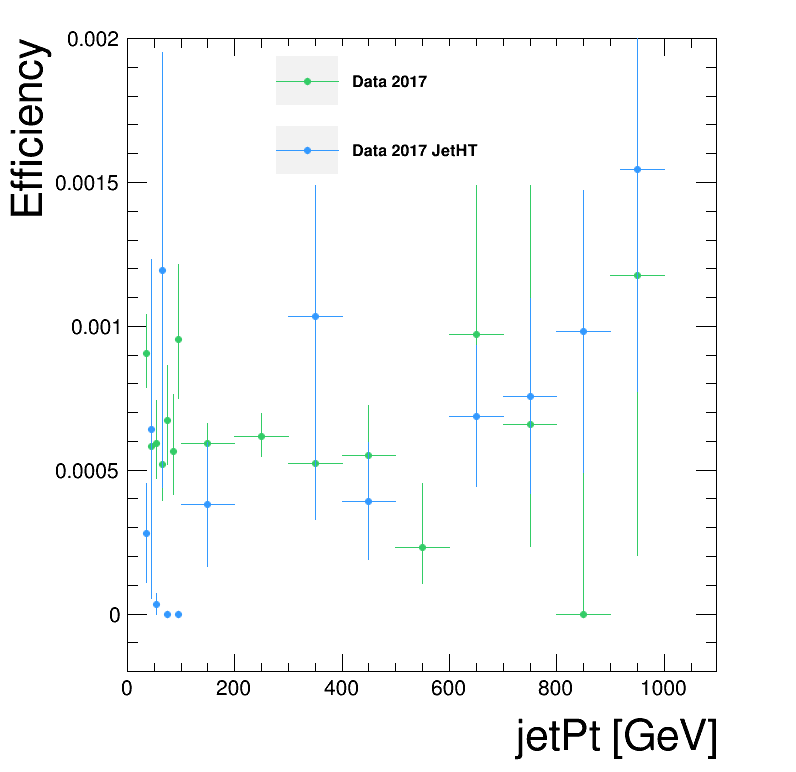

In [20]:

   

color_list = [845,861,806,1,876,597,625]

pEff = {}
for var in variables:
    print('var/x_axis', var[0], 'name', var[2], 'range',var[3],var[4])
#     outf = 'tag_eff_jet_'+var[2]+'_pt100.png'
#     outf = 'tag_eff_jet_'+var[2]+'_rebin.png'
    outf = 'tag_eff_jet_'+var[2]+'_rebin_comparison.png'
#     outf = 'tag_eff_jet_'+var[2]+'_rebin_2017_2018.png'
#     outf = 'tag_eff_jet_'+var[2]+'.png'
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.33,0.76,0.78,0.94)
    leg.SetTextSize(0.022)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    i = 0
    for k,v in tree.items(): 
        print(k,v)


        if 'bb' not in k:
#         if 'QCD' in k:
            pEff[k] = var[1][k]
#             pEff[k] = rt.TEfficiency(eta_num_all[k], eta_den_all[k])
#             pEff[k] = rt.TEfficiency(pt_num_all[k], pt_den_all[k])
            pEff[k].SetTitle("efficiency;"+var[0]+";Efficiency")

            pEff[k].SetLineColor(color_list[i])
            pEff[k].SetMarkerColor(color_list[i])
            pEff[k].SetMarkerSize(0.8)
            pEff[k].SetMarkerStyle(20)

            if i==0:
                pEff[k].Draw("apez")
            else:
                pEff[k].Draw("pezsame")

            rt.gPad.Update()        
            #pEff[k].GetPaintedHistogram().GetXaxis().SetRangeUser(x[0],x[-1])
            pEff[k].GetPaintedGraph().SetMarkerStyle(8)
            pEff[k].GetPaintedGraph().SetMarkerSize(20)        
            pEff[k].GetPaintedGraph().SetLineColor(color_list[i])        
            pEff[k].GetPaintedGraph().SetMarkerColor(color_list[i])        
            pEff[k].GetPaintedGraph().SetMinimum(var[3])
            pEff[k].GetPaintedGraph().SetMaximum(var[4])
            pEff[k].GetPaintedGraph().GetXaxis().SetLabelSize(0.03)
            pEff[k].GetPaintedGraph().GetYaxis().SetLabelSize(0.03)


#             print('dim: ', pEff[k].GetDimension())
#             print('binN: ', pEff[k].GetPaintedGraph().GetN())
#             print('binN: ', pEff[k].GetPassedHistogram().GetNbinsX())
#             for cnt in range(len(x)):
#                 print(cnt)
#                 print('bin central x value: ', pEff[k].GetPassedHistogram().GetBinCenter(cnt))
#                 print('bin central y value: ', pEff[k].GetEfficiency(cnt))
#                 print('bin error y low: ', pEff[k].GetEfficiencyErrorLow(cnt))
#                 print('bin error y up: ', pEff[k].GetEfficiencyErrorUp(cnt))

            i += 1



            leg.AddEntry(pEff[k],k)

    leg.Draw()

    # c.SetLogy()
    c.SetRightMargin(0.1)
    c.Update()
    c.Draw()
    c.SaveAs(plotDir+outf)


# Tag Eff vs Rho

In [12]:
from itertools import chain 

wall = {}
wnum = {}

#var
rho_denall = {}
rho_numall = {}

#h1s
rho_den_all = {}
rho_num_all = {}

#pEffs of h1
rho_pEff = {}
 

for k,v in tree.items():
    print(k,v)
    
    # denominator
    rho_denall[k] = [np.array([x]*len(y)) for x,y in zip(trg_jet_rho[k],trg_jet_pt[k])]
    rho_denall[k] = list(chain.from_iterable(rho_denall[k])) 
    
    wall[k] = [np.array([x]*len(y)) for x,y in zip(trg_jet_w[k],trg_jet_pt[k])]
    wall[k] = list(chain.from_iterable(wall[k])) 
    
    print(len(rho_denall[k]))
    print(len(wall[k]))
    
    
    #numerator
    rho_numall[k] = [np.array([x]*len(y)) for x,y in zip(trg_jet_rho[k],tag_jet_pt[k])]
    rho_numall[k] = list(chain.from_iterable(rho_numall[k])) 
    
    wnum[k] = [np.array([x]*len(y)) for x,y in zip(trg_jet_w[k], tag_jet_pt[k])]
    wnum[k] = list(chain.from_iterable(wnum[k])) 
    
    print(len(rho_numall[k]))
    print(len(wnum[k]))
    
    #h1 histogram
    rho_den_all[k] = create_TH1D( rho_denall[k], axis_title=['rho', 'fraction of events'], name="", binning=[100,-0,100], weights=wall[k])
    rho_num_all[k] = create_TH1D( rho_numall[k], axis_title=['rho', 'fraction of events'], name="", binning=[100,-0,100], weights=wnum[k])

    print(pt_den_all[k].GetNbinsX())
    
    #rebin 
#     x=array('d', [10*ix for ix in range(100)])
#     x=array('d', [1,10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900,1000])
#     x=array('d', [1,10,20,30,40,50,60,70,80,90,100])
#     x=array('d', [1,100,200,300,400,500,600,700,800,900])
    
#     pt_den_all[k]=pt_den_all[k].Rebin(len(x)-1,'',x)
#     pt_num_all[k]=pt_num_all[k].Rebin(len(x)-1,'',x)
    
#     print(pt_den_all[k].GetNbinsX())

    
 
    #efficiency
    rho_pEff[k] = rt.TEfficiency(rho_num_all[k], rho_den_all[k])
 

Data 2016 <TTree b'SusyLLPTree' at 0x7f3424711c50>
607684
607684
541
541
19
Data 2017 <TTree b'SusyLLPTree' at 0x7f33e2b7bcf8>
660804
660804
413
413
19
Data 2018 <TTree b'SusyLLPTree' at 0x7f33e0193240>
1142619
1142619
392
392
19


In [17]:
variables = [
    
        ['rho', rho_pEff, 'rho', -0.0002, 0.005],
        
]

var/x_axis rho name rho range -0.0002 0.005
Data 2016 <TTree b'SusyLLPTree' at 0x7f3424711c50>
Data 2017 <TTree b'SusyLLPTree' at 0x7f33e2b7bcf8>
Data 2018 <TTree b'SusyLLPTree' at 0x7f33e0193240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20200616/Data/goodlumi_1lep_eb_t-1_phoef_0p8_muef_0p6_eleef_0p6/tag_eff_jet_rho.png has been created


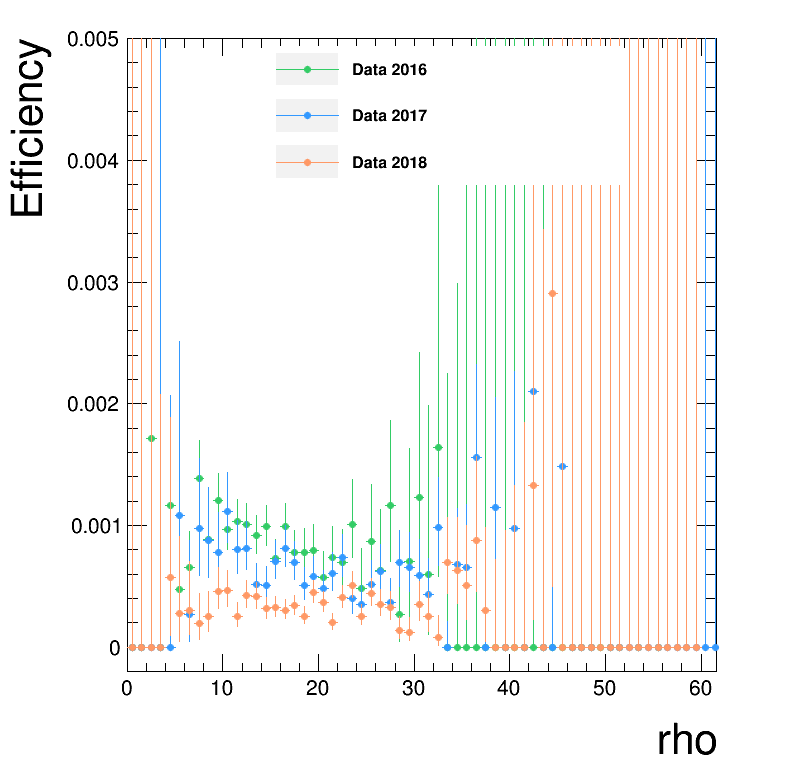

In [18]:

   

color_list = [845,861,806,1,876,597,625]

pEff = {}
for var in variables:
    print('var/x_axis', var[0], 'name', var[2], 'range',var[3],var[4])
#     outf = 'tag_eff_jet_'+var[2]+'_rebin.png'
    outf = 'tag_eff_jet_'+var[2]+'.png'
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.33,0.76,0.78,0.94)
    leg.SetTextSize(0.022)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    i = 0
    for k,v in tree.items(): 
        print(k,v)


        if 'bb' not in k:
#         if 'QCD' in k:
            pEff[k] = var[1][k]
#             pEff[k] = rt.TEfficiency(eta_num_all[k], eta_den_all[k])
#             pEff[k] = rt.TEfficiency(pt_num_all[k], pt_den_all[k])
            pEff[k].SetTitle("efficiency;"+var[0]+";Efficiency")

            pEff[k].SetLineColor(color_list[i])
            pEff[k].SetMarkerColor(color_list[i])
            pEff[k].SetMarkerSize(0.8)
            pEff[k].SetMarkerStyle(20)

            if i==0:
                pEff[k].Draw("apez")
            else:
                pEff[k].Draw("pezsame")

            rt.gPad.Update()        
            #pEff[k].GetPaintedHistogram().GetXaxis().SetRangeUser(x[0],x[-1])
            pEff[k].GetPaintedGraph().SetMarkerStyle(8)
            pEff[k].GetPaintedGraph().SetMarkerSize(20)        
            pEff[k].GetPaintedGraph().SetLineColor(color_list[i])        
            pEff[k].GetPaintedGraph().SetMarkerColor(color_list[i])        
            pEff[k].GetPaintedGraph().SetMinimum(var[3])
            pEff[k].GetPaintedGraph().SetMaximum(var[4])
            pEff[k].GetPaintedGraph().GetXaxis().SetLabelSize(0.03)
            pEff[k].GetPaintedGraph().GetYaxis().SetLabelSize(0.03)


#             print('dim: ', pEff[k].GetDimension())
#             print('binN: ', pEff[k].GetPaintedGraph().GetN())
#             print('binN: ', pEff[k].GetPassedHistogram().GetNbinsX())
#             for cnt in range(len(x)):
#                 print(cnt)
#                 print('bin central x value: ', pEff[k].GetPassedHistogram().GetBinCenter(cnt))
#                 print('bin central y value: ', pEff[k].GetEfficiency(cnt))
#                 print('bin error y low: ', pEff[k].GetEfficiencyErrorLow(cnt))
#                 print('bin error y up: ', pEff[k].GetEfficiencyErrorUp(cnt))

            i += 1



            leg.AddEntry(pEff[k],k)

    leg.Draw()

    # c.SetLogy()
    c.SetRightMargin(0.1)
    c.Update()
    c.Draw()
    c.SaveAs(plotDir+outf)


# jet pho mdphi

In [13]:
variables = [
    
        ['jetPho_minDeltaPhi', trg_pho_mdphi, 50, 0, 3.15],
        
]

var/x_axis jetPho_minDeltaPhi binning 50 0 3.15
Data 2017 SinglePhoton 1
 (13 TeV)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20200616/Data/pho/tag_eff_jet_minDeltaPhi(jet, photon).png has been created


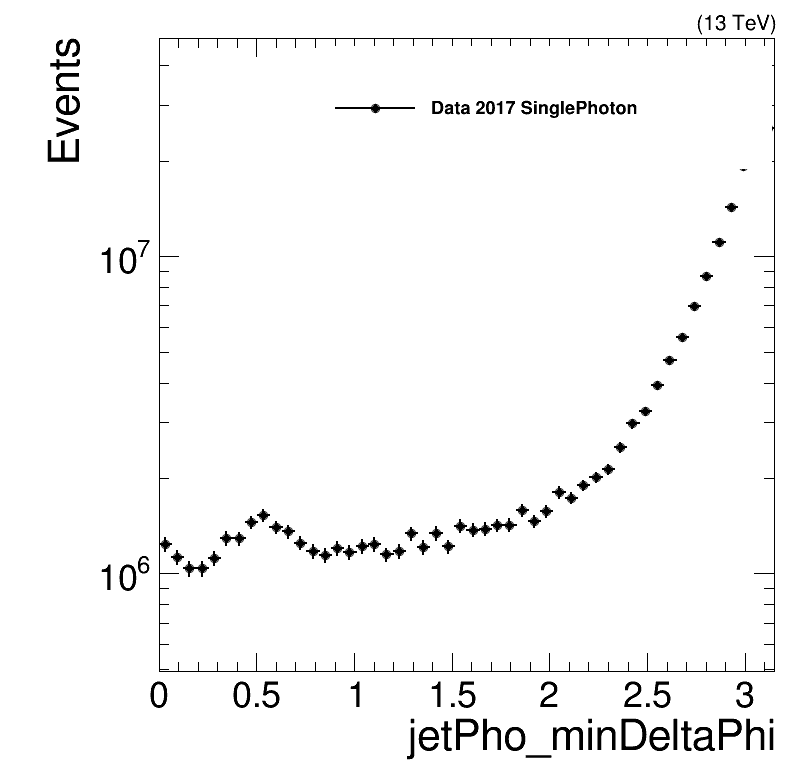

In [17]:
for var in variables:
    print('var/x_axis', var[0], 'binning', var[2], var[3], var[4])
    x_axis = var[0]
    y_axis = 'Events'
    axis_set = [x_axis, y_axis]
    bin_set = [var[2],var[3],var[4]]
    lumi = 41500 
#     outf = var[0]+'_stack.png'
    
    # Plotting THStack
    c = rt.TCanvas('c','c', 800, 800)
    ht = {}
    # leg = rt.TLegend(0.59,0.70,0.97,0.93)
    leg = rt.TLegend(0.40,0.78,0.97,0.94)

    leg.SetTextSize(0.025)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    
   
 
    color_list = [845,806,861,876,597,625]
 
    data_keys = ['Data 2017 SinglePhoton']
 
    i=0
    for k in data_keys:
        pt1 = var[1][k] 
        v = pt1 
        w = trg_jet_w[k] 

        ht[k] = create_TH1D( v, axis_title=axis_set, name=k, binning=bin_set,weights = w*1)
        ht[k].Sumw2()
        ht[k].SetLineColor(std_color_list[i])
        ht[k].SetMarkerColor(std_color_list[i])
        ht[k].SetMarkerStyle(20)
        ht[k].SetMarkerSize(1.)
        print(k, std_color_list[i])
        ht[k].Draw("p E same")
        leg.AddEntry(ht[k],k)
#         leg.AddEntry(ht[k],k+' '+str(lumi/1000)+' /fb')

        i+=1

    leg.Draw()




    CMS_lumi.lumi_13TeV = ''
#     CMS_lumi.lumi_13TeV = str(lumi/1000)+" fb^{-1}"
    CMS_lumi.cmsText = ""
    CMS_lumi.writeExtraText = False
    CMS_lumi.CMS_lumi(c,4,3)


    c.SetLeftMargin(0.2)
    c.SetRightMargin(0.027)
    c.SetLogy()
    c.Draw()
    c.SaveAs(plotDir+outf)
 